# Create a Random Forest to determine the Feature Importance

### Import Statements and Read in Data

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

with open('fixed_match_dates_and_scores.pkl', 'rb') as f:
    results, match_dates = pickle.load(f)
    
#Full match Data
home_df = pd.read_csv('sgd_home.csv', index_col=0)
away_df = pd.read_csv('sgd_away.csv', index_col=0)

### Read in and Format Data

In [2]:
X = []
y = []

#For each date where a game was played
for date in match_dates:

    #For each match played that day
    for result in results[date]:
        
        #Try to get the specific team from the specific match's data
        try:
            data = home_df.loc[result[0]+'_'+str(date), :]
            #If the data is not complete, ignore it
            if(len(data) == 16):
                X.append(data)
                y.append(float(result[3][0]))
            #The above was home data, below is away data
            data = away_df.loc[result[1]+'_'+str(date), :]
            if(len(data) == 16):
                X.append(data)
                y.append(float(result[3][1]))
        except:
            pass
        
#Sanity Check        
print(len(X))

#Convert to numpy array and remove missing elements
X = np.asarray(X, dtype='float64')
y = np.asarray(y, dtype='float64')
X = np.nan_to_num(X)
print(X[0], y[0])
print(X[1], y[1])

10261
[  63.   13.    8.    1.    5.    5.    2.   37.   20.    1.    2.   17.
    6.   41.  495.   79.] 0.0
[  37.   23.    8.    2.    4.    2.    4.   37.   17.    1.    2.   21.
    9.   32.  284.   70.] 1.0


### Perform Random Forests

In [3]:
#Create and fit the Classifier
clf = RandomForestClassifier(max_depth=9, random_state=0)

clf.fit(X, y)
print(clf.score(X,y))

0.527628886073


### Display results

In [4]:
#List of Features
features = ['possession', 'fouls', 'shots', 'shotsongoal','offtarget','cornerkicks','yellowcards','headtheball','headsuccess','saves','blocked','tackles','dribbles','throwins','pass','passsuccess']

#List of Importances
importances = clf.feature_importances_

#Display pairs
for f, i in zip(features, importances):
    print(f, i)


possession 0.0491493921639
fouls 0.0555780781363
shots 0.0633854299975
shotsongoal 0.181390065961
offtarget 0.0507142134979
cornerkicks 0.0642943789164
yellowcards 0.0453338654231
headtheball 0.0500843159605
headsuccess 0.04270083884
saves 0.0463715641403
blocked 0.0510796828099
tackles 0.0525111370379
dribbles 0.0526089219691
throwins 0.0548438738306
pass 0.0587499291017
passsuccess 0.0812043122138


### Graph Explained Variance Ratios

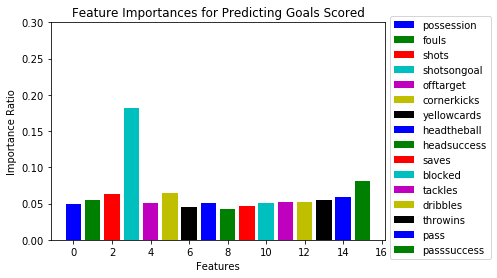

In [5]:
#More than enough colors!
COLORS = 'bgrcmykbgrcmykbgrcmyk'

#For every label add a bar
for i, label in enumerate(features):
        plt.bar(i, importances[i], label = label, color = COLORS[i])

#Graph bells and whistles
plt.title("Feature Importances for Predicting Goals Scored")
plt.xlabel('Features')
plt.ylabel('Importance Ratio')
plt.ylim((0, .3))
plt.legend(bbox_to_anchor=(1.0, 1.05))

#Display!
plt.show()

In [6]:
#Which features have an importance of more than 1%?
print("These features have an importance of the average or more for 16 features:\n")
for f, i in zip(features, importances):
    if(i*100 >= (100/16)):
        print(f,"=", i*100)

These features have an importance of the average or more for 16 features:

shots = 6.33854299975
shotsongoal = 18.1390065961
cornerkicks = 6.42943789164
passsuccess = 8.12043122138
